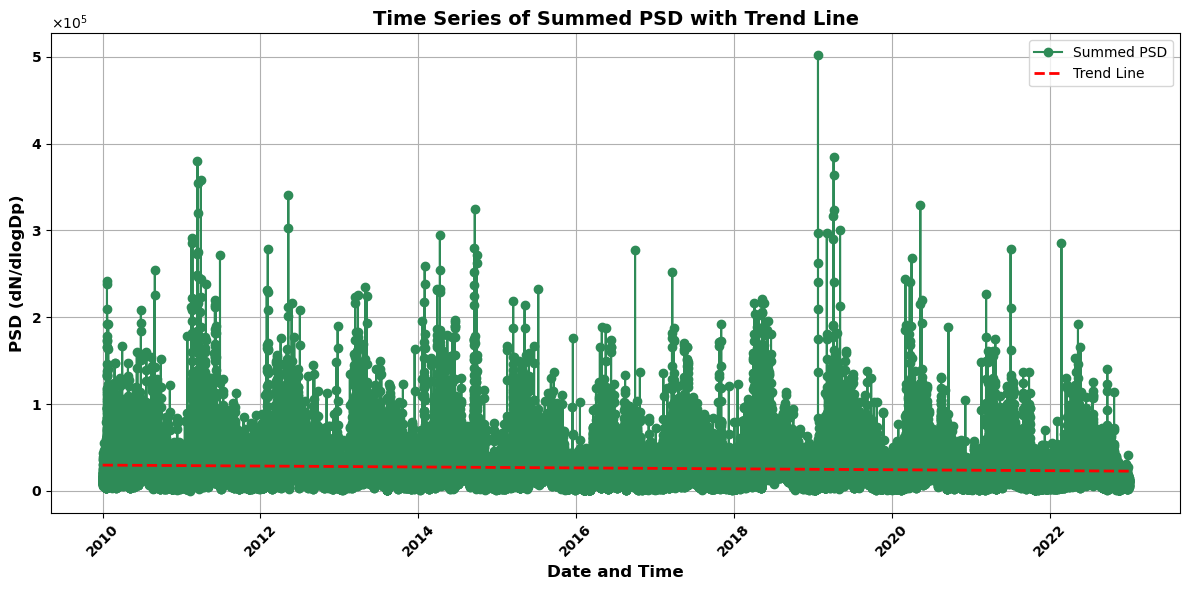

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
data = pd.read_excel(file_path)

# Sum the values from columns B to AM for each row
data['Sum_PNC'] = data.iloc[:, 1:40].sum(axis=1)  # Columns B to AM are at index 1 to 39

# Convert the 'Date and Time' column to datetime if not already
data['datetime'] = pd.to_datetime(data['datetime'])

# Convert datetime to numerical values for regression
data['timestamp'] = data['datetime'].map(pd.Timestamp.timestamp)

# Perform linear regression (1st degree polynomial fit)
slope, intercept = np.polyfit(data['timestamp'], data['Sum_PNC'], 1)
trend_line = slope * data['timestamp'] + intercept

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(data['datetime'], data['Sum_PNC'], marker='o', linestyle='-', color='seagreen', label='Summed PSD')
plt.plot(data['datetime'], trend_line, color='red', linestyle='--', linewidth=2, label='Trend Line')  # Trend Line

plt.title('Time Series of Summed PSD with Trend Line', fontweight='bold', fontsize=14)
plt.xlabel('Date and Time', fontweight='bold', fontsize=12)
plt.ylabel('PSD (dN/dlogDp)', fontweight='bold', fontsize=12)
plt.grid(True)

# Set y-axis to scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Make x and y ticks bold and more prominent
plt.xticks(fontweight='bold', fontsize=10, rotation=45)
plt.yticks(fontweight='bold', fontsize=10)

# Add legend
plt.legend()

plt.tight_layout()
plt.show()

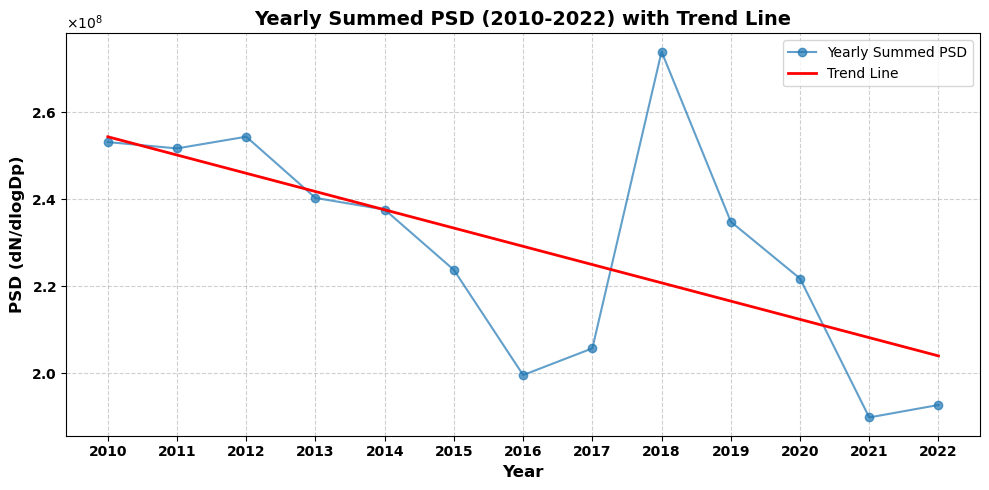

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load the data
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
data = pd.read_excel(file_path)

# Convert 'Date and Time' column to datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Sum the values from columns B to AM (Index 1 to 39) for each row
data['Sum_PSD'] = data.iloc[:, 1:40].sum(axis=1)  # Ensure 'Sum_PSD' is created

# Extract the year
data['year'] = data['datetime'].dt.year

# Ensure 'Sum_PSD' is present before grouping
if 'Sum_PSD' not in data.columns:
    raise KeyError("Column 'Sum_PSD' not found. Ensure column indexing is correct.")

# Aggregate: Sum PSD for each year (2010 to 2022)
yearly_sum = data.groupby('year', as_index=False)['Sum_PSD'].sum()

# Fit a linear trend line
slope, intercept = np.polyfit(yearly_sum['year'], yearly_sum['Sum_PSD'], 1)
trend_line = slope * yearly_sum['year'] + intercept

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_sum['year'], yearly_sum['Sum_PSD'], marker='o', linestyle='-', label='Yearly Summed PSD', alpha=0.7)
plt.plot(yearly_sum['year'], trend_line, color='red', linestyle='-', linewidth=2, label='Trend Line')

# Formatting
plt.title('Yearly Summed PSD (2010-2022) with Trend Line', fontweight='bold', fontsize=14)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('PSD (dN/dlogDp)', fontweight='bold', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Y-axis in scientific notation
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Improve readability of ticks
plt.xticks(yearly_sum['year'], fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

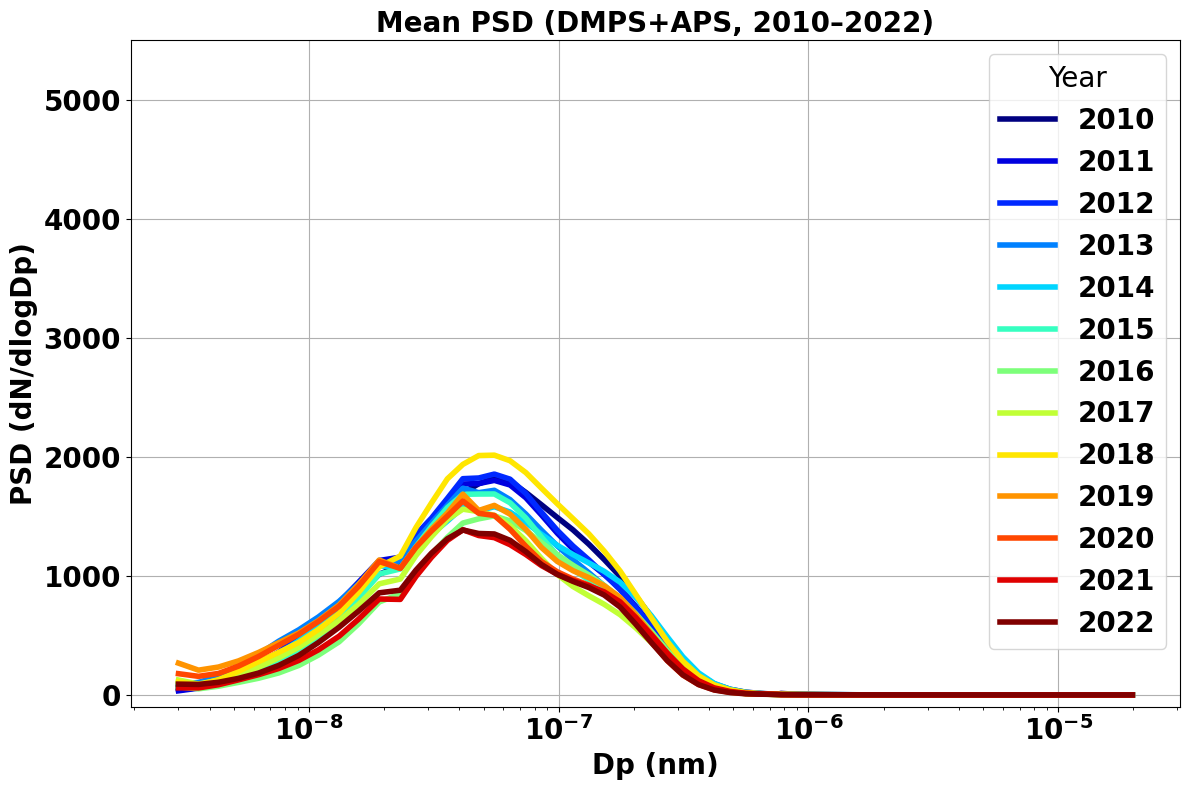

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'Date' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using the mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean PSD (DMPS+APS, 2010–2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
y_min = -100  # Set minimum y-axis value
y_max = 5500  # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

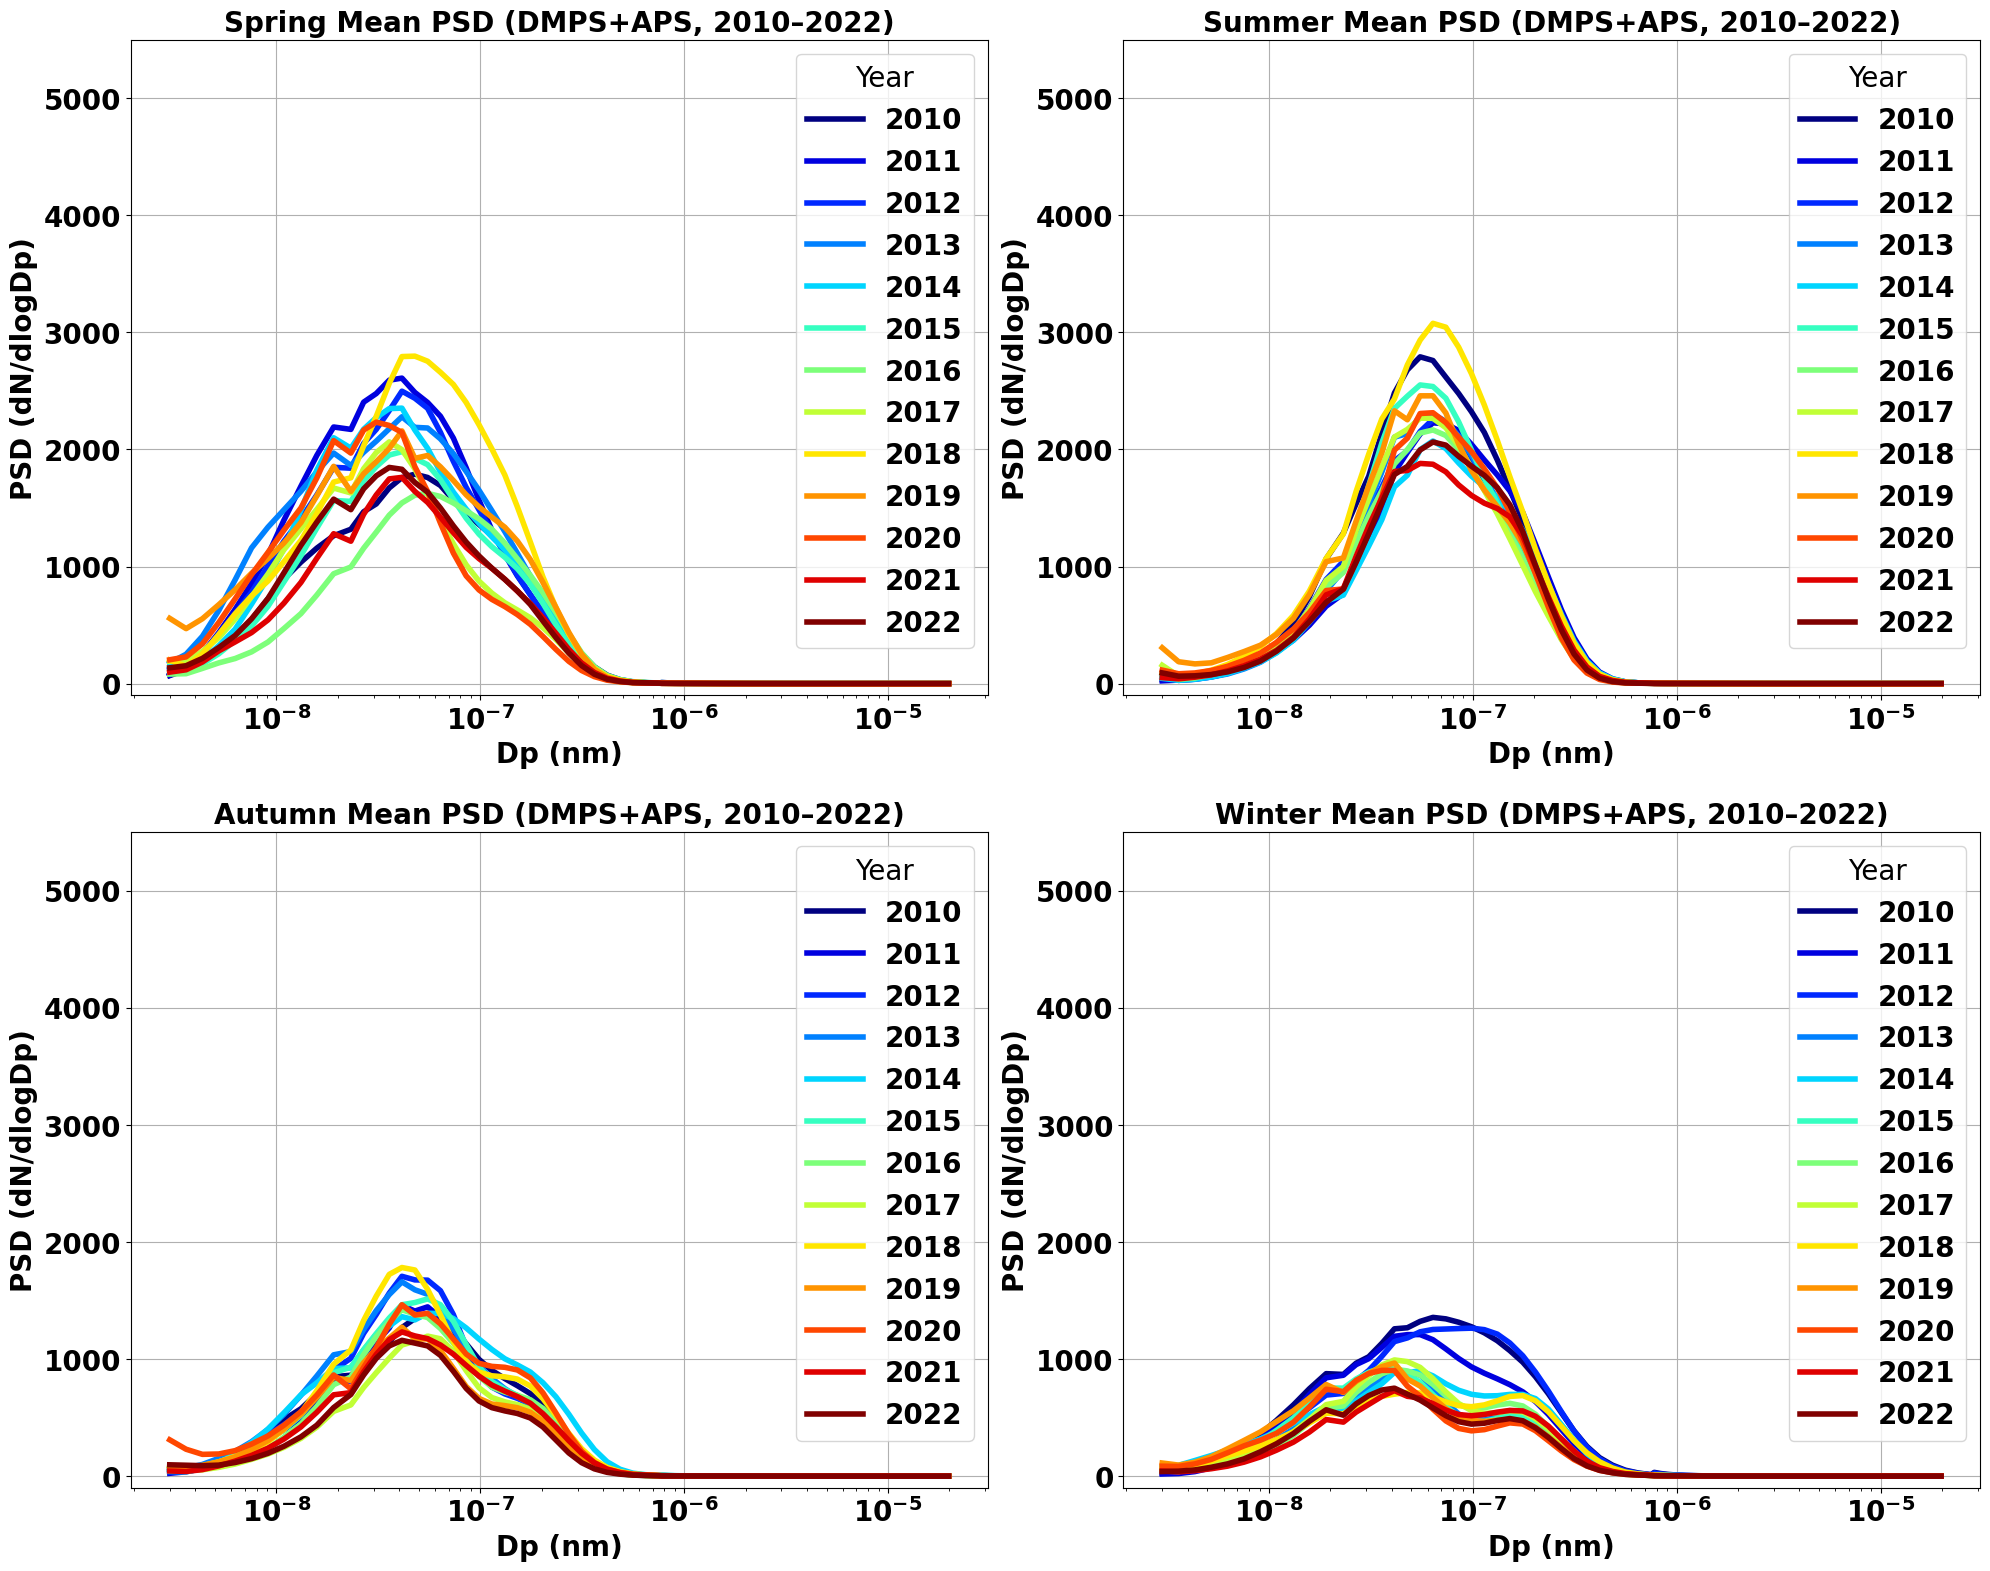

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_mean_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['datetime'].dt.month.isin(months) & data['datetime'].dt.year.between(2010, 2022)]
        years = sorted(season_data['datetime'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        ax = axes[i]
        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['datetime'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            mean_psd = yearly_data.iloc[:, 1:].mean()

            ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

        ax.set_title(f'{season} Mean PSD (DMPS+APS, 2010–2022)', fontsize=20, weight='bold')
        ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
        ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
        for text in legend.get_texts():
            text.set_weight('bold')

        ax.tick_params(axis='both', which='major', labelsize=20)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.xaxis.get_offset_text().set_weight('bold')
        ax.yaxis.get_offset_text().set_fontsize(20)
        ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
y_min = -100   # Minimum y-axis value
y_max = 5500   # Maximum y-axis value

plot_mean_psd_by_season(file_path, y_min, y_max)

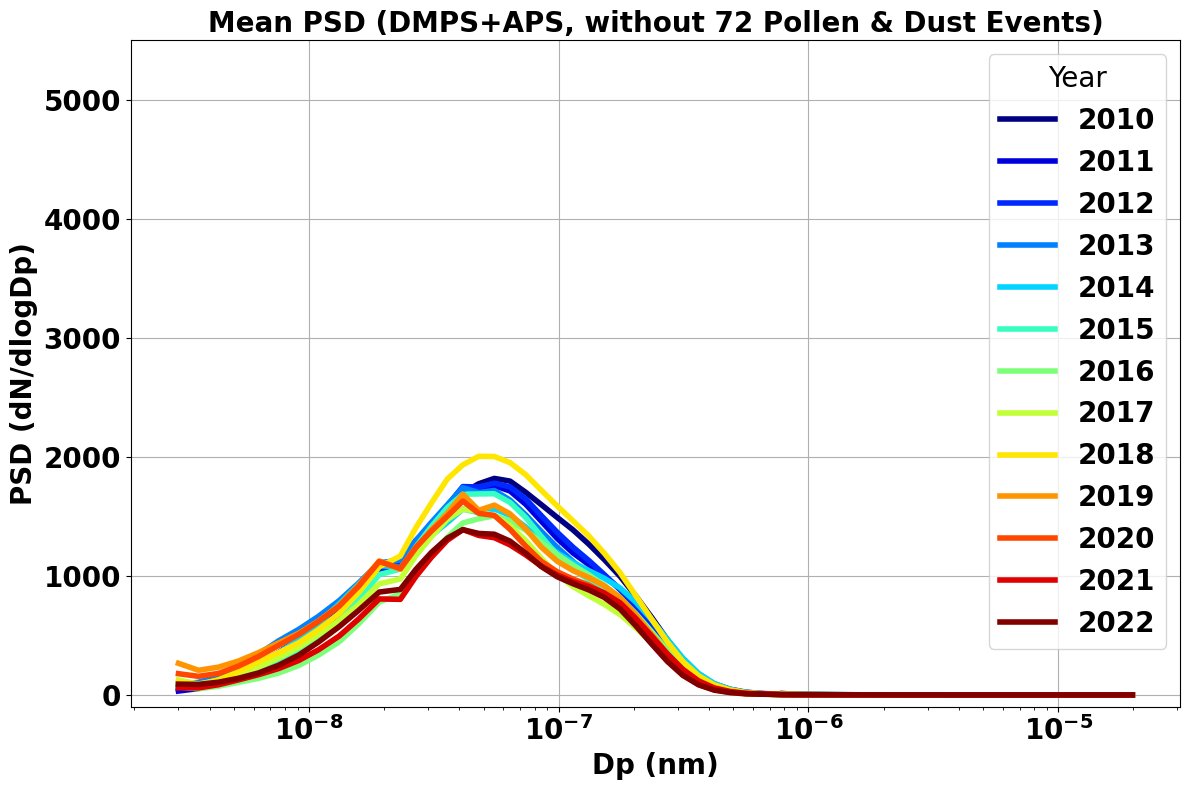

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean PSD (DMPS+APS, without 72 Pollen & Dust Events)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. Without 72 Pollen and dust events.xlsx'
y_min = -100  # Set minimum y-axis value
y_max = 5500  # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

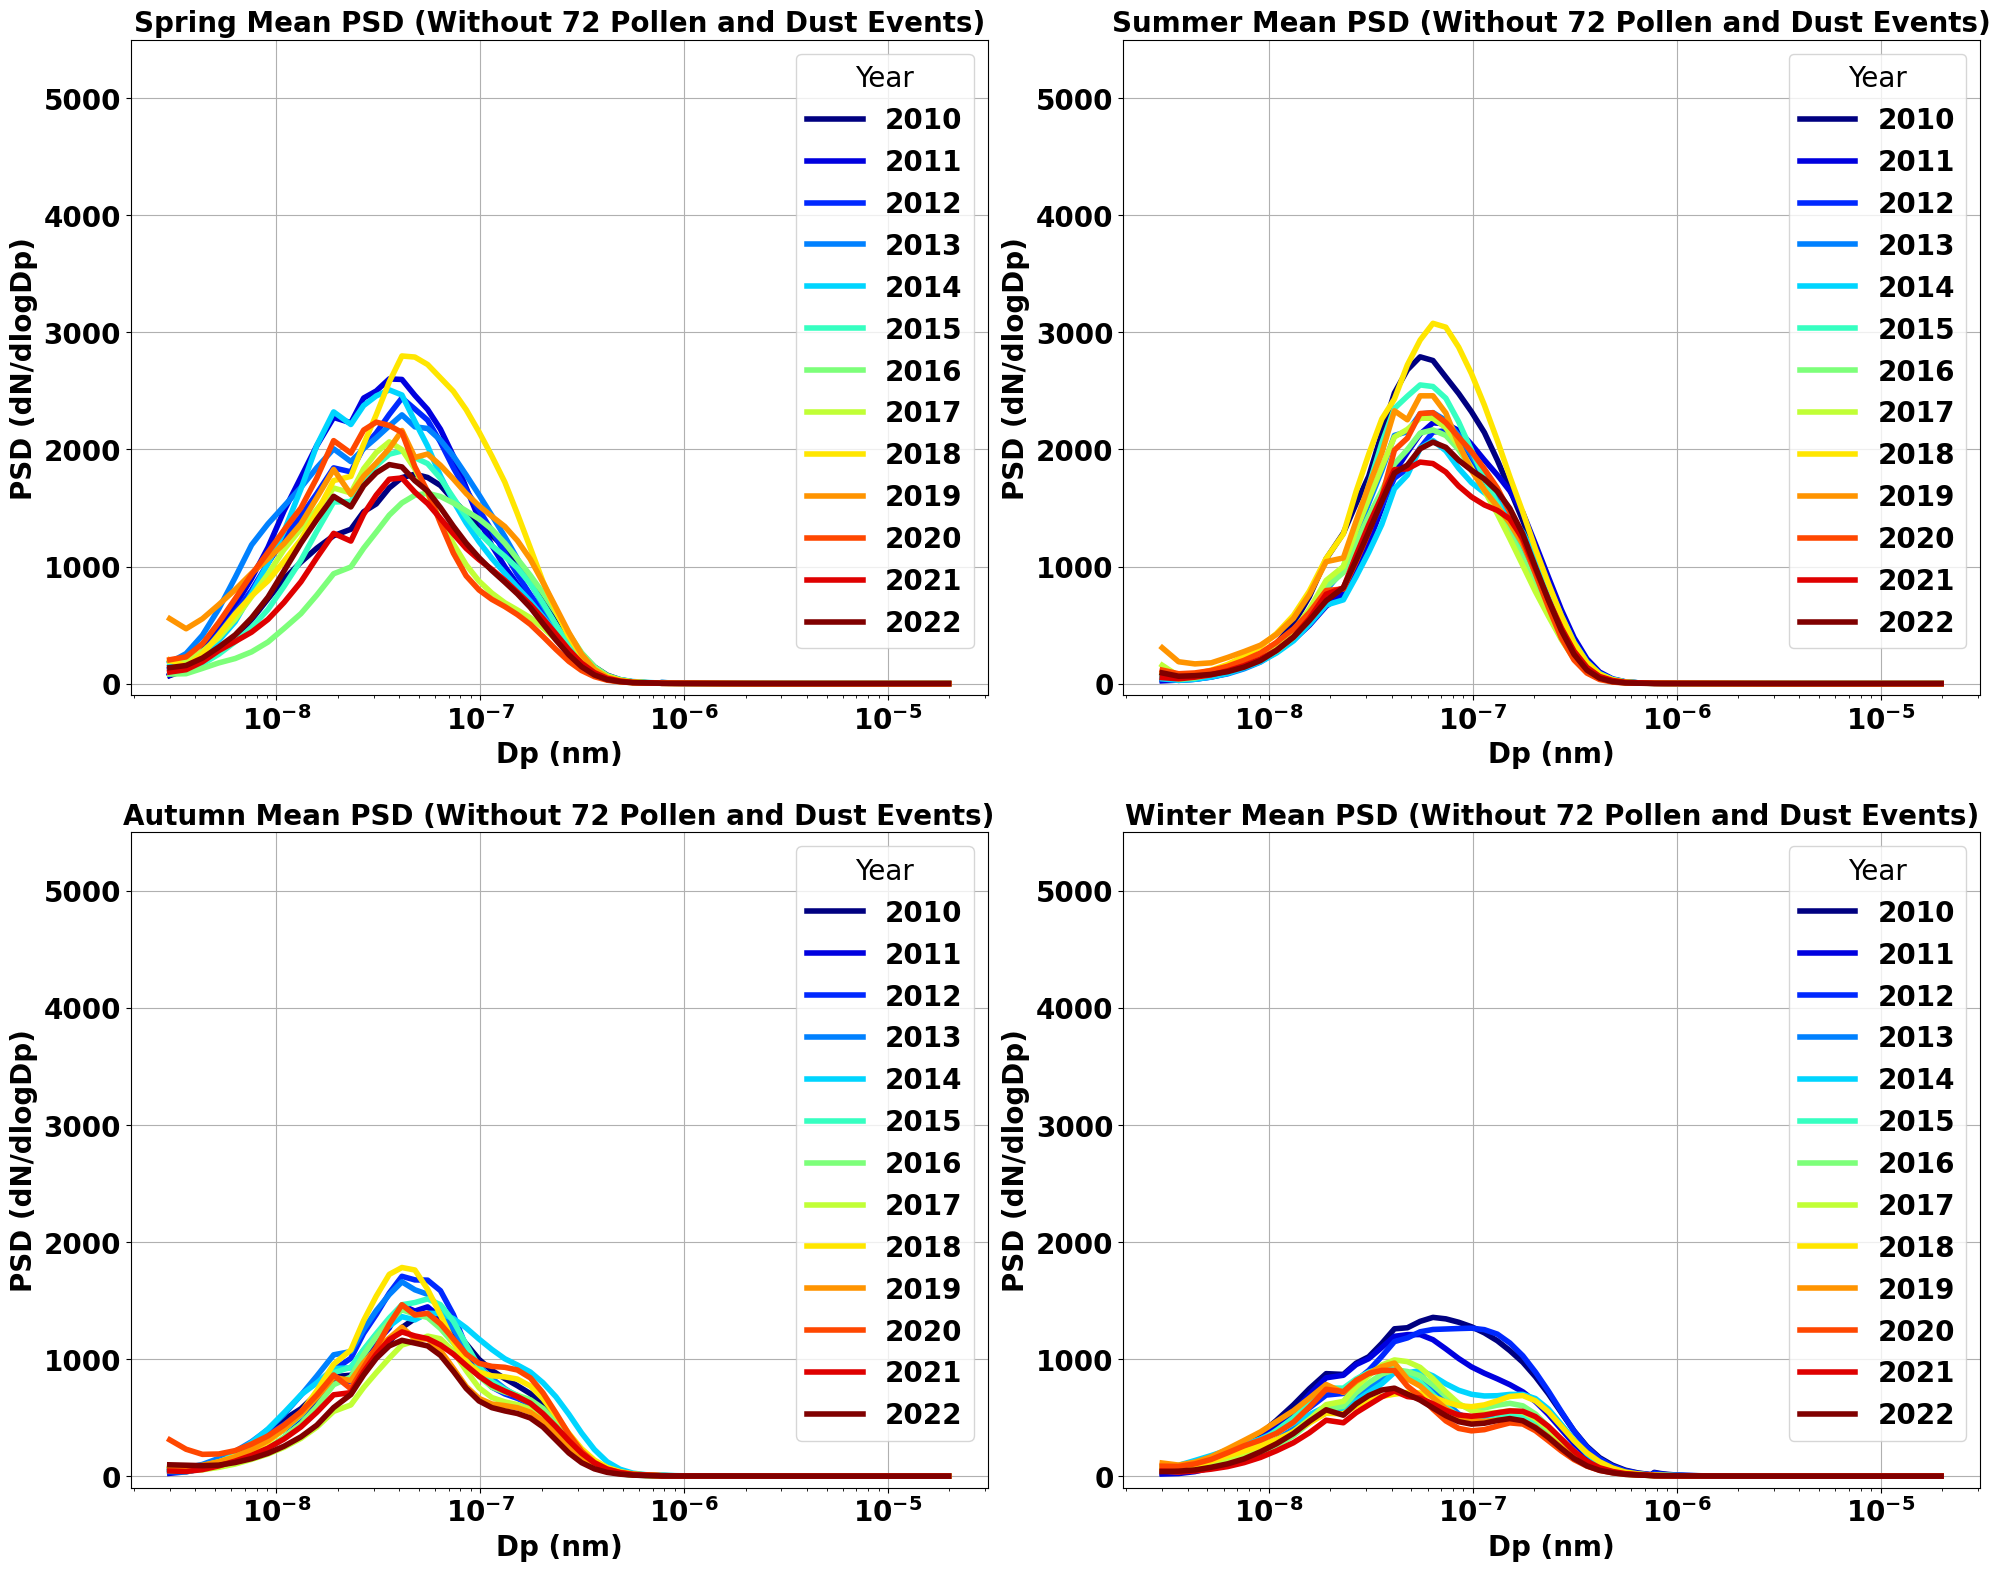

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_mean_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['datetime'].dt.month.isin(months) & data['datetime'].dt.year.between(2010, 2022)]
        years = sorted(season_data['datetime'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        ax = axes[i]
        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['datetime'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum

            ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

        ax.set_title(f'{season} Mean PSD (Without 72 Pollen and Dust Events)', fontsize=20, weight='bold')
        ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
        ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
        for text in legend.get_texts():
            text.set_weight('bold')

        ax.tick_params(axis='both', which='major', labelsize=20)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.xaxis.get_offset_text().set_weight('bold')
        ax.yaxis.get_offset_text().set_fontsize(20)
        ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. Without 72 Pollen and dust events.xlsx'
y_min = -100   # Minimum y-axis value
y_max = 5500   # Maximum y-axis value

plot_mean_psd_by_season(file_path, y_min, y_max)

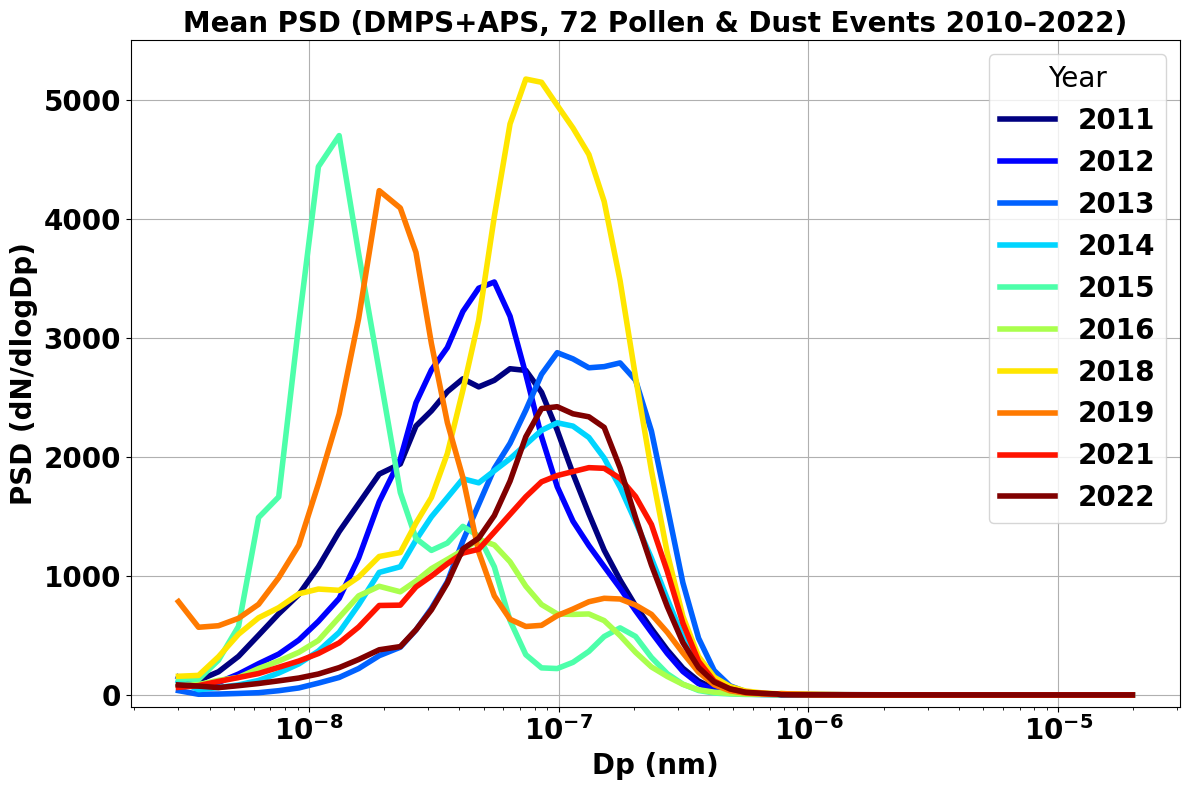

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_psd_by_years(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Filter data for years 2010 to 2022
    data = data[data['datetime'].dt.year.between(2010, 2022)]
    years = sorted(data['datetime'].dt.year.unique())

    # Prepare a figure
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

    # Plot data for each year using mean
    for year, color in zip(years, colors):
        yearly_data = data[data['datetime'].dt.year == year]
        yearly_data = yearly_data.dropna(subset=diameters)
        mean_psd = yearly_data.iloc[:, 1:].mean()  # Use mean instead of sum
        
        ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

    # Set plot titles and labels
    ax.set_title('Mean PSD (DMPS+APS, 72 Pollen & Dust Events 2010–2022)', fontsize=20, weight='bold')
    ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
    ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
    ax.set_ylim(y_min, y_max)
    ax.grid(True)
    legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
    for text in legend.get_texts():
        text.set_weight('bold')

    # Adjusting the tick labels and exponent notation
    ax.tick_params(axis='both', which='major', labelsize=20)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

    # Set the offset text for scientific notation to be bold and size 20
    ax.xaxis.get_offset_text().set_fontsize(20)
    ax.xaxis.get_offset_text().set_weight('bold')
    ax.yaxis.get_offset_text().set_fontsize(20)
    ax.yaxis.get_offset_text().set_weight('bold')

    # Display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Close the plot to free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. 72 Pollen and dust events.xlsx'
y_min = -100  # Set minimum y-axis value
y_max = 5500  # Set maximum y-axis value

plot_psd_by_years(file_path, y_min, y_max)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


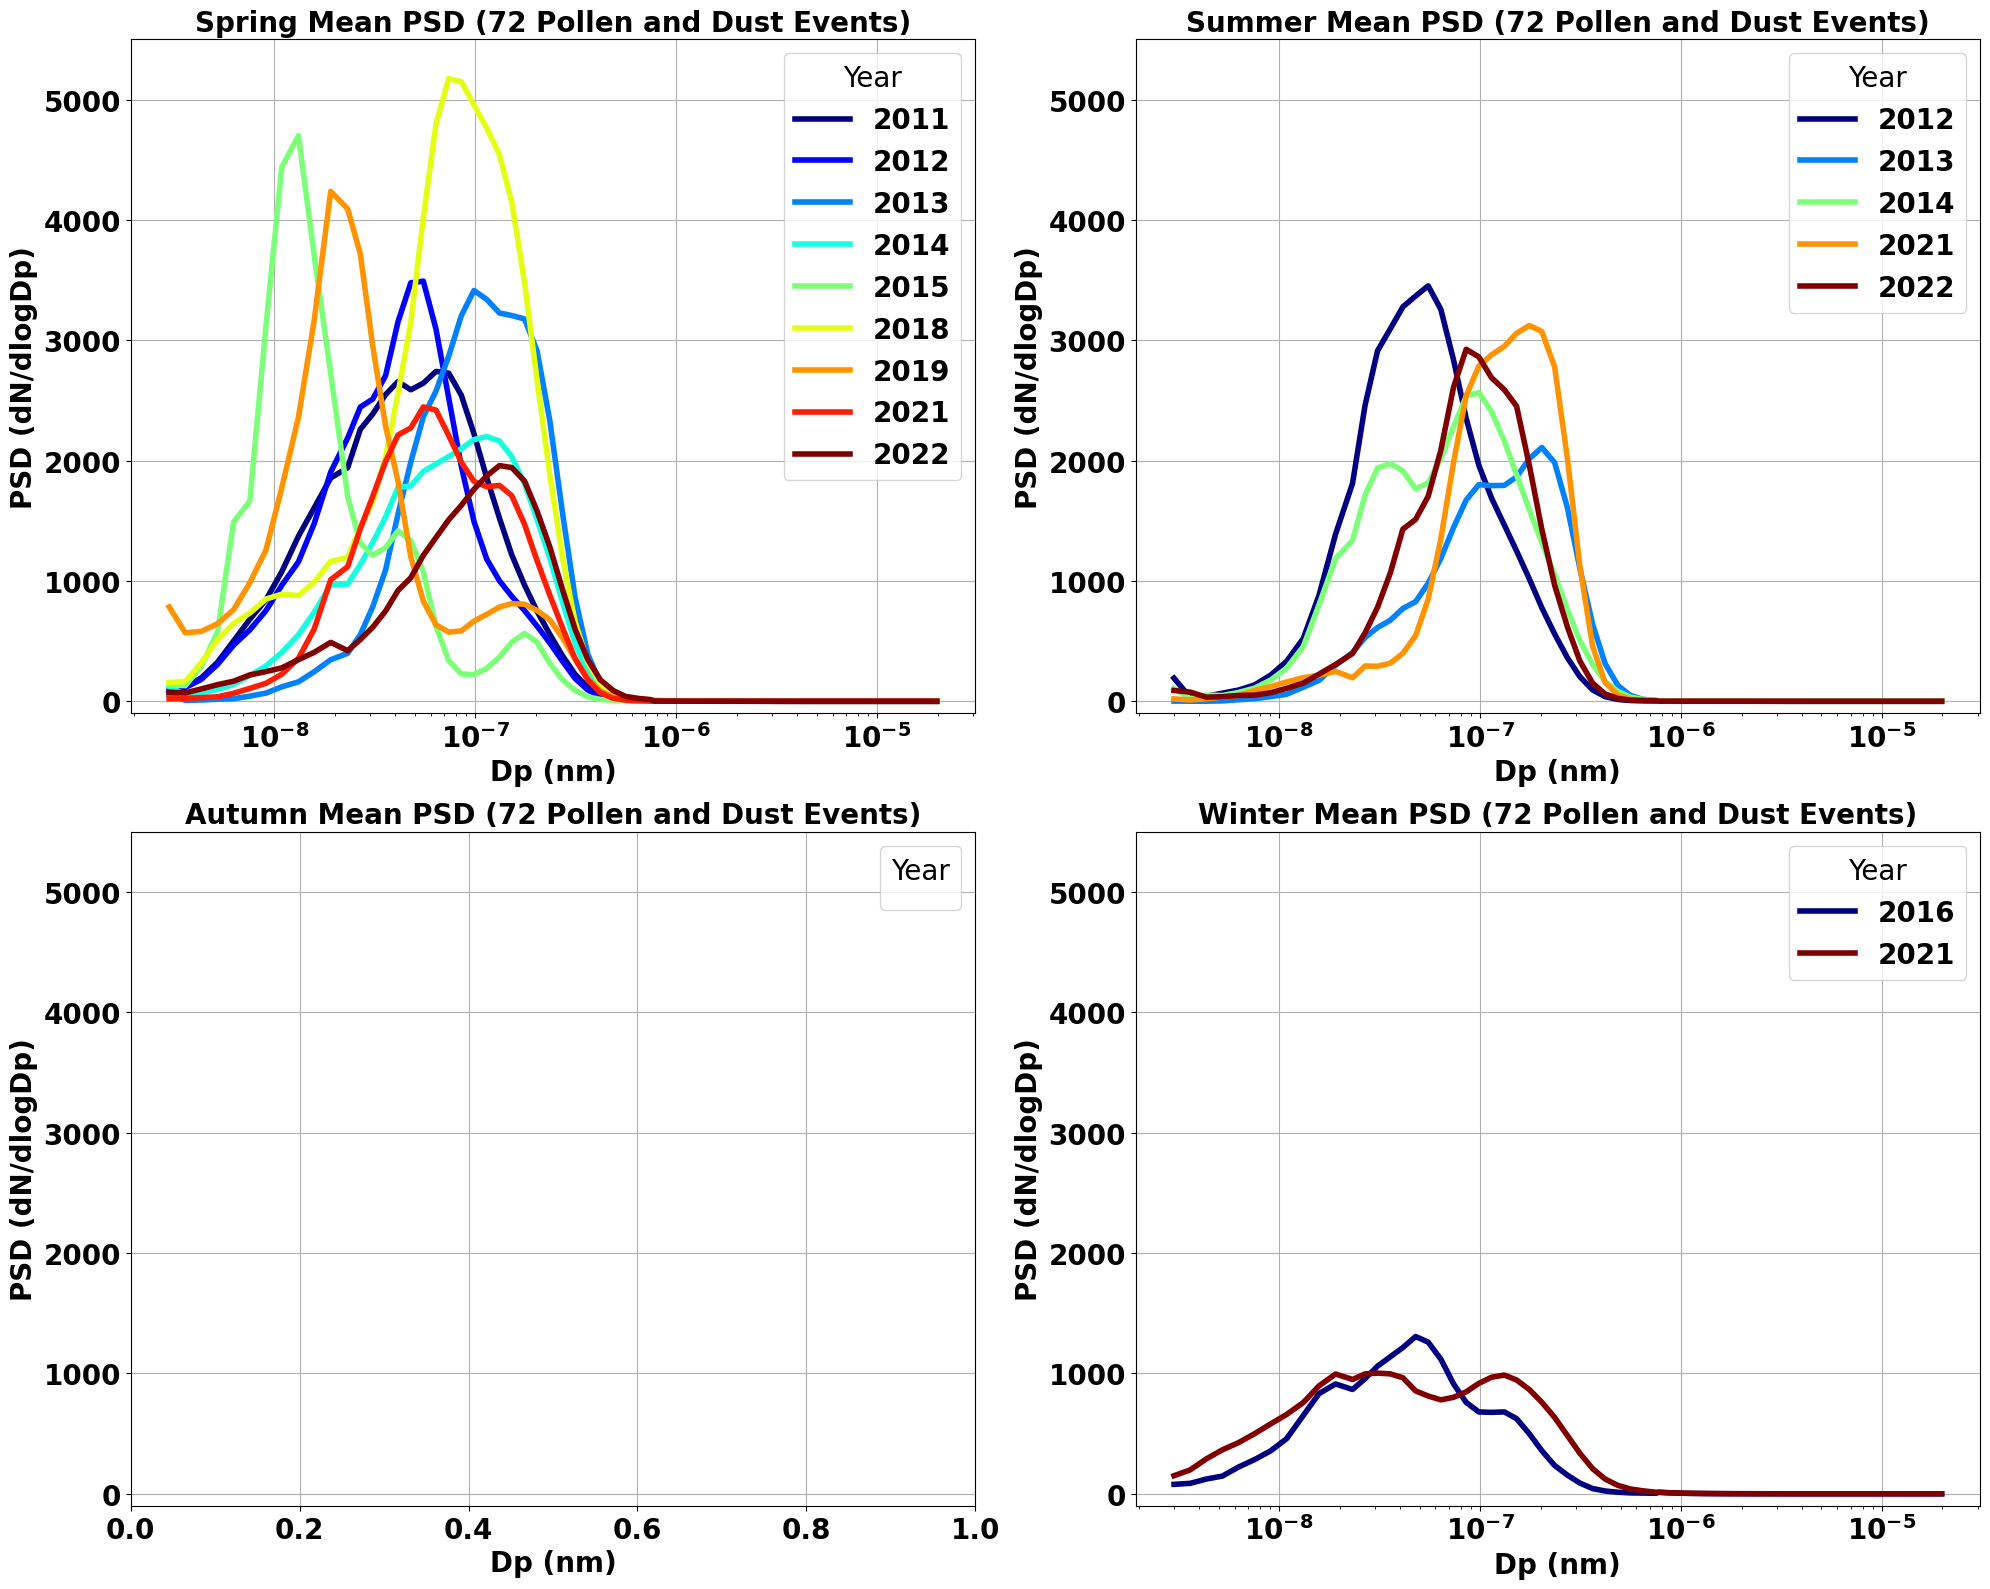

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for numerical operations

def plot_mean_psd_by_season(file_path, y_min, y_max):
    # Load the data
    data = pd.read_excel(file_path)
    
    # Ensure 'datetime' column is datetime type for easy manipulation
    data['datetime'] = pd.to_datetime(data['datetime'])
    
    # Extracting diameters and converting to float for logarithmic plotting
    diameters = data.columns[1:]  # Ignore the 'datetime' column
    diameters_float = [float(d) for d in diameters]

    # Define seasons
    seasons = {
        'Spring': (3, 4, 5),
        'Summer': (6, 7, 8),
        'Autumn': (9, 10, 11),
        'Winter': (12, 1, 2)
    }

    # Prepare a large figure to hold all subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Plot each season
    for i, (season, months) in enumerate(seasons.items()):
        season_data = data[data['datetime'].dt.month.isin(months) & data['datetime'].dt.year.between(2010, 2022)]
        years = sorted(season_data['datetime'].dt.year.unique())
        colors = plt.cm.jet(np.linspace(0, 1, len(years)))  # Color mapping

        ax = axes[i]
        for year, color in zip(years, colors):
            yearly_data = season_data[season_data['datetime'].dt.year == year]
            yearly_data = yearly_data.dropna(subset=diameters)
            mean_psd = yearly_data.iloc[:, 1:].mean()

            # Plot mean PSD
            ax.semilogx(diameters_float, mean_psd, linewidth=4, color=color, label=str(year))

        # Set plot formatting
        ax.set_title(f'{season} Mean PSD (72 Pollen and Dust Events)', fontsize=20, weight='bold')
        ax.set_xlabel('Dp (nm)', fontsize=20, weight='bold')
        ax.set_ylabel('PSD (dN/dlogDp)', fontsize=20, weight='bold')
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

        legend = ax.legend(title="Year", fontsize=20, title_fontsize=20)
        for text in legend.get_texts():
            text.set_weight('bold')

        ax.tick_params(axis='both', which='major', labelsize=20)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontweight('bold')

        ax.xaxis.get_offset_text().set_fontsize(20)
        ax.xaxis.get_offset_text().set_weight('bold')
        ax.yaxis.get_offset_text().set_fontsize(20)
        ax.yaxis.get_offset_text().set_weight('bold')

    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()
    plt.close(fig)  # Free up memory

# Specify the path to your Excel file and custom y-axis limits
file_path = '/Users/touqeergill/Desktop/10. 72 Pollen and dust events.xlsx'
y_min = -100   # Minimum y-axis value
y_max = 5500  # Maximum y-axis value

plot_mean_psd_by_season(file_path, y_min, y_max)